In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Problem Statement**

The problem that we are going to solve here is that given a set of features that describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. To train our machine learning model with insurance data, we will be using [ClaimantsData](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv)

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
data.shape

(1340, 7)

In [5]:
# dropping the casenum column
data.drop(['CASENUM'],axis=1,inplace=True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [6]:
data.shape

(1340, 6)

In [8]:
data.describe() #to check for description

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [9]:
data.isnull().sum()      #checking missing values

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [12]:
data.CLMSEX.value_counts()

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

In [11]:
data.CLMSEX.value_counts().index[0]  #most repeated in CLMSEX column

1.0

In [13]:
data.CLMINSUR.value_counts().index[0]   #most repeated in CLMINSUR column

1.0

In [14]:
#creating a user defined function for imputing the missing values  with mode
#lambda--> lambda argument: expression
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))
data.isnull().sum()
    

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

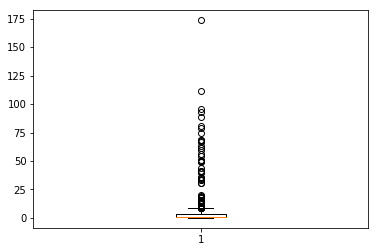

In [15]:
# loss column  #Datapoint < Q
plt.boxplot(data.LOSS)
plt.show()

In [ ]:
data.iloc[]  #[indices of columns we need to access]

In [20]:
# split the data into input and output
X= data.iloc[:,1:]
y= data.ATTORNEY

In [22]:
#split the data into training and testing
# we will build model on training data and check performance on test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [23]:
# build the classifier on training data
#sklearn library: import,instantiate,fit
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)  #input and output will be passed to fit method

C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
#predicting on train data
# syntax : objectname.predict(Input)
y_train_pred =reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [36]:
# confusion matrix for the training data
# confusion matrix(actual values,predicted values)
from sklearn.metrics import confusion_matrix , accuracy_score
conf = confusion_matrix(y_train,y_train_pred)
conf

array([[315, 170],
       [107, 346]], dtype=int64)

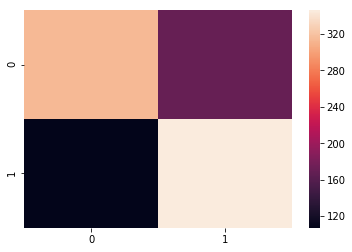

In [28]:
sns.heatmap(conf)

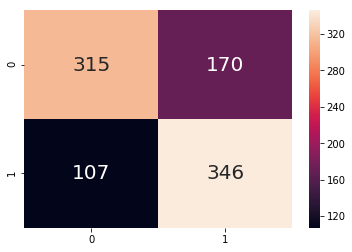

In [32]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [39]:
conf

array([[315, 170],
       [107, 346]], dtype=int64)

In [41]:
conf[0][0]
conf[0][1]

170

In [48]:
# accessing the values of confusion matrix with row index and column index
print('true_positive=',conf[0][0])
print('false_positive=',conf[0][1])
print('false_negative=', conf[1][0])
print('true_negative=',conf[1][1])

true_positive= 315
false_positive= 170
false_negative= 107
true_negative= 346


In [37]:
# accuracy-->TP+TN/(TP+FP+TN+FN)
#correct predictions / total no.of predictions
(315+345)/(315+170+107+346)

0.7036247334754797

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7046908315565032

In [49]:
true_positive=conf[0][0]
false_positive=conf[0][1]
false_negative=conf[1][0]
true_negative=conf[1][1]

In [45]:
#precision  rate
Precision = true_positive/(true_positive+ false_positive)
Precision

0.6494845360824743

In [46]:
from sklearn .metrics import precision_score
precision_score(y_train,y_train_pred)

0.6705426356589147

In [50]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7464454976303317

In [51]:
#calculation of F1 score for the model
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred)   #f1_score(actual values,predicted values)

0.7141382868937047